# Classify the breast cancer measurements as benign or malignant


* Do this using the best practices discussed in class (i.e. one hot encoding, ReLU, CNNS when you should, etc.)

* Have reasonable hyperparameters


In [1]:
# Importing the libraries
import numpy as np
import keras
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd





/home/anirudh/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Loading the Data and Scaling the Features

In [2]:
# Loading the Training and Testing Data
X = pd.read_csv('./Breast Cancer/breastCancerData.csv')
Y = pd.read_csv('./Breast Cancer/breastCancerLabels.csv')

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Y= np.array(Y)

/home/anirudh/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/anirudh/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Splitting the Data into Training, Validation and Test Data

In [3]:
# Splitting the Data into Training and Test Data
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.15)

# Splitting the Training Data into training and Validation Data
X_train, X_val,Y_train,Y_val = train_test_split(X_train, Y_train, test_size=0.2)

print("For this problem the number of training data is:" + str(X_train.shape[0]) +"\nThe number of" +
" validation data is:" + str(X_val.shape[0]) + "\nand the number of test data is:" + str(X_test.shape[0]))

For this problem the number of training data is:463
The number of validation data is:116
and the number of test data is:103


# Showing the Training Data after Normalizing

In [4]:
# Preview the training data
print (pd.DataFrame(np.hstack((X_train[0:5],Y_train[0:5])),columns= 
                    ['radius', 'texture','perimeter', 'area' , 'smoothness','compactness', 'concavity',
                     'concave points', 'symmetry','Is it Malignant?']))

     radius   texture  perimeter      area  smoothness  compactness  \
0  1.974488  2.234474   2.270732  1.814105   -0.555361     1.778269   
1  1.974488  0.929476   0.262989 -0.637916   -0.105532     0.127855   
2  0.199843 -0.701771  -0.740883  0.062662   -0.555361    -0.697352   
3  1.974488  2.234474   0.932237  0.062662   -0.105532     1.778269   
4  0.199843  1.255725   1.266861 -0.637916    0.794126     1.228131   

   concavity  concave points  symmetry  Is it Malignant?  
0   0.226259       -0.612417 -0.348686               1.0  
1  -0.181965       -0.284834  0.805702               1.0  
2  -0.998412       -0.612417 -0.348686               0.0  
3   0.226259        0.042749  0.228508               1.0  
4  -0.181965        0.370332 -0.348686               0.0  


# Setting Hyper Paramters

In [5]:
# Hyper Parameters
batch_size = 32
num_classes = 2
epochs = 15

# Creating Model

In [6]:
# create model
model = Sequential()
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
model.add(Dropout( 0.2))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Get Model Summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total para

# Weights and Biases for First Layer 

In [7]:
# Before Training
weights = model.layers[0].get_weights()
w0 = np.array(weights[0])
b0 = np.array(weights[1])
print("The weights for first layer has dimensions of " + str(w0.shape))
print()
print("The Biases for first layer has dimensions of " + str(b0.shape)+" and the values are :\n" + str(b0))
print()
print("Just so we know that the weights have changed after training,\
 we will be comparing the sum of weights of the first layer before and after training.")
print()
print("The sum of weights of the first layer is :" + str(w0.sum()))
print("The sum of biases of the first layer is :" + str(b0.sum()))



The weights for first layer has dimensions of (9, 64)

The Biases for first layer has dimensions of (64,) and the values are :
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Just so we know that the weights have changed after training, we will be comparing the sum of weights of the first layer before and after training.

The sum of weights of the first layer is :-0.27367854
The sum of biases of the first layer is :0.0


# Training the Model

Training Loss: 0.0713097348479357
Training Accuracy: 0.9740820734341252

Validation Loss: 0.07167263894245543
Validation Accuracy: 0.9741379289791502

Test Loss: 0.0852863776488501
Test Accuracy: 0.9805825242718447



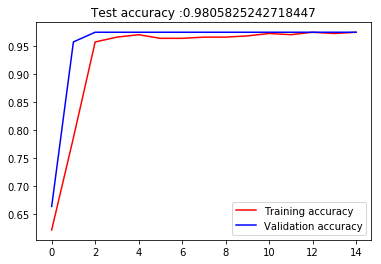

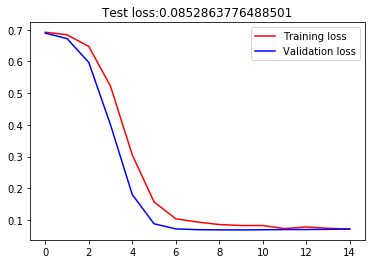

In [8]:
# Train 
h = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
validation_data=(X_val, Y_val))

# Evaluate Accuracy

score = model.evaluate(X_test, Y_test, verbose=0)

print('Training Loss:', h.history['loss'][-1])
print('Training Accuracy:', h.history['acc'][-1])
print()
print('Validation Loss:', h.history['val_loss'][-1])
print('Validation Accuracy:', h.history['val_acc'][-1])
print()
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])
print()

# Plot Graphs
# print(h.history.keys())
accuracy = h.history['acc']
val_accuracy = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Test accuracy :' + str(score[1]))
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Test loss:'+str(score[0]))
plt.legend()
plt.show()


# Inferences
* Here a simple fully connected model was ale to get a convergence in 15 epochs with a batch size of 32.
* As the test accuracy was also above 97 %, we can say that the parameters chosen are correct.
* A simple fully connected model worked here as the input is a less complex matrix as compared to images in MNIST and fashion MNIST. Also Conv2D is not used as it is needed when we want to extract features from images.
* ** Dense Layers: ** Four fully connect layers are used with dropouts in between. The hidden units are again taken in power of 2. 
* ** Drop Out: ** This is very Essential as it helps prevent over fitting. The drop out rate was set to 0.1.
* Using other methods like BatchNormalization and Maxpolling is not required here because of the simplicity of the model or the less number of weights.
* As this is a binary classifier, the final layer consists of sigmoid function as activation and the loss function used is a binary_crossentropy loss.
    


#  Weights and Biases for First Layer After Training 

In [9]:
# After Training
weights = model.layers[0].get_weights()
w0 = np.array(weights[0])
b0 = np.array(weights[1])
print("The weights for first layer has dimensions of " + str(w0.shape))
print()
print("The Biases for first layer has dimensions of " + str(b0.shape)+" and the values are :\n" + str(b0))
print()
print("The sum of weights of the first layer is :" + str(w0.sum()))
print("The sum of biases of the first layer is :" + str(b0.sum()))
print("As we can see the sum has changed, indicating that the weights are now tuned.")


The weights for first layer has dimensions of (9, 64)

The Biases for first layer has dimensions of (64,) and the values are :
[0.00565082 0.11447307 0.11100366 0.12224284 0.11190101 0.11120802
 0.09813787 0.0932091  0.10682337 0.10079738 0.10276962 0.10654137
 0.11700526 0.11261878 0.11765338 0.1042446  0.12294795 0.12512106
 0.11745223 0.10702112 0.13799985 0.09850707 0.11602484 0.1184485
 0.11815976 0.122028   0.0988709  0.13012977 0.10767307 0.12677155
 0.09933781 0.12721375 0.09612524 0.08008504 0.09697195 0.1109754
 0.0802253  0.11672504 0.12173473 0.11094635 0.10507268 0.11560145
 0.11227549 0.04680694 0.1264726  0.11976074 0.07090484 0.10593776
 0.10071041 0.12147024 0.11003634 0.09747186 0.09982739 0.10775392
 0.12674405 0.11154057 0.11493925 0.14127669 0.11108415 0.13439618
 0.1074697  0.12055368 0.0631986  0.1232283 ]

The sum of weights of the first layer is :-15.355629
The sum of biases of the first layer is :6.9183106
As we can see the sum has changed, indicating that the

# Calculate Confusion Matrix

In [10]:

# Predict the values from the validation dataset
Y_pred1 = model.predict(X_test)
Y_pred= (Y_pred1>0.5)*1 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_test, Y_pred) 
print("Confusion Matrix is :\n"+str(confusion_mtx))


Confusion Matrix is :
[[62  1]
 [ 1 39]]


# Incorrect Predictions


In [11]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred - Y_test != 0)
incorrect = (errors*1).sum()
print ("Number of Incorrect Predicitons are: " + str(incorrect)+ " out of "+ str (errors.size)+" inputs")
Y_pred_errors = Y_pred1[errors]
Y_true_errors = Y_test[errors]
errordata = np.zeros(shape=(incorrect,11))
pos = np.where(errors == True)
for i in range(0,pos[0].size):
    errordata1 = np.hstack((X_test[pos[0][i]],Y_test[pos[0][i]]))
    errordata1 = np.reshape(np.hstack((errordata1,Y_pred[pos[0][i]])),(1,11))
    errordata[i] = errordata1

print()
print("Displaying the errors")
# Preview the training data
print (pd.DataFrame(errordata,columns= 
                    ['radius', 'texture','perimeter', 'area' , 'smoothness','compactness', 'concavity',
                     'concave points', 'symmetry','Actual Value','Predictd Value']))

Number of Incorrect Predicitons are: 2 out of 103 inputs

Displaying the errors
     radius   texture  perimeter      area  smoothness  compactness  \
0  0.199843 -0.701771  -0.406259  2.514682    0.344297     0.402924   
1 -0.155086 -0.701771  -0.740883  0.062662   -1.005190     0.402924   

   concavity  concave points  symmetry  Actual Value  Predictd Value  
0  -0.590189       -0.612417 -0.348686           0.0             1.0  
1  -0.590189       -0.612417 -0.348686           1.0             0.0  


# Human_Detector
[![Build Status](https://travis-ci.org/anirudhtopiwala/Human_Detector.svg?branch=master)](https://travis-ci.org/anirudhtopiwala/Human_Detector)
[![Coverage Status](https://coveralls.io/repos/github/anirudhtopiwala/Human_Detector/badge.svg?branch=master)](https://coveralls.io/github/anirudhtopiwala/Human_Detector?branch=master)
---

## Overview
Human detection is an old and important problem in the field of object detection.Current technologies
easily detect static obstacles. But, detecting dynamic obstacles has always been tough.In dynamic obstacles, human obstacles are the most important as any collision might lead to injury or loss of life which is highly undesirable for any product. This has generated a need for an accurate detector for making the algorithms more robust and efficient. 

To this extent we propose an algorithm that can detect humans in frame by making rectangular bounding
boxes around individual humans. The center position of the rectangle will be used as the pixel location in
that frame. The pixel coordinates can then be used with a robots intrinsic and extrinsic transformations (not
considered in this project) to track the human with respect to the robot world frame.  We would be using
Histogram of Oriented Gradient (HOG) as the feature extractor. Support Vector Machine (SVM) will be used
as a classifier which will be using the extracted HOG features as a classifying factor [1]. The data set used for
training images will be from Caltech Pedestrian Dataset [2] or the INRIA Person Dataset [

## Project Breakdown
<p align="center">
<img src="https://github.com/anirudhtopiwala/Human_Detector/blob/master/ProjectBreakdown.jpg">
</p>

## Standard install via command-line
```
git clone --recursive https://github.com/anirudhtopiwala/Human_Detector.git
cd <path to repository>
mkdir build
cd build
cmake ..
make
Run tests: ./test/cpp-test
Run program: ./app/detect
```

## Building for code coverage (for assignments beginning in Week 4)
```
sudo apt-get install lcov
cmake -D COVERAGE=ON -D CMAKE_BUILD_TYPE=Debug ../
make
make code_coverage
```
This generates a index.html page in the build/coverage sub-directory that can be viewed locally in a web browser.

## Working with Eclipse IDE ##

## Installation

In your Eclipse workspace directory (or create a new one), checkout the repo (and submodules)
```
mkdir -p ~/workspace
cd ~/workspace
git clone --recursive https://github.com/anirudhtopiwala/Human_Detector.git
```

In your work directory, use cmake to create an Eclipse project for an [out-of-source build] of cpp-boilerplate

```
cd ~/workspace
mkdir -p boilerplate-eclipse
cd boilerplate-eclipse
cmake -G "Eclipse CDT4 - Unix Makefiles" -D CMAKE_BUILD_TYPE=Debug -D CMAKE_ECLIPSE_VERSION=4.7.0 -D CMAKE_CXX_COMPILER_ARG1=-std=c++14 ../cpp-boilerplate/
```

## Import

Open Eclipse, go to File -> Import -> General -> Existing Projects into Workspace -> 
Select "boilerplate-eclipse" directory created previously as root directory -> Finish

# Edit

Source files may be edited under the "[Source Directory]" label in the Project Explorer.


## Dependencies

Install OpenCV 3.3.0 using the following commands

Install Dependencies
```
sudo apt-get install build-essential checkinstall cmake pkg-config yasm gfortran git
sudo apt-get install libjpeg8-dev libjasper-dev libpng12-dev
# If you are using Ubuntu 14.04
sudo apt-get install libtiff4-dev
# If you are using Ubuntu 16.04
sudo apt-get install libtiff5-dev
sudo apt-get install libavcodec-dev libavformat-dev libswscale-dev libdc1394-22-dev
sudo apt-get install libxine2-dev libv4l-dev
sudo apt-get install libgstreamer0.10-dev libgstreamer-plugins-base0.10-dev
sudo apt-get install libqt4-dev libgtk2.0-dev libtbb-dev
sudo apt-get install libatlas-base-dev
sudo apt-get install libfaac-dev libmp3lame-dev libtheora-dev
sudo apt-get install libvorbis-dev libxvidcore-dev
sudo apt-get install libopencore-amrnb-dev libopencore-amrwb-dev
sudo apt-get install x264 v4l-utils
```
Download and Compile OpenCV
```
git clone https://github.com/opencv/opencv.git
cd opencv 
git checkout 3.3.0 
cd ..
git clone https://github.com/opencv/opencv_contrib.git
cd opencv_contrib
git checkout 3.3.0
cd ..
cd opencv
mkdir build
cd build
cmake -D CMAKE_BUILD_TYPE=RELEASE \
      -D CMAKE_INSTALL_PREFIX=/usr/local \
      -D INSTALL_C_EXAMPLES=ON \
      -D WITH_TBB=ON \
      -D WITH_V4L=ON \
      -D WITH_QT=ON \
      -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
      -D BUILD_EXAMPLES=ON ..
# find out number of CPU cores in your machine
nproc
# substitute 4 by output of nproc
make -j4
sudo make install
sudo sh -c 'echo "/usr/local/lib" >> /etc/ld.so.conf.d/opencv.conf'
sudo ldconfig
```
## How to build
```
git clone --recursive https://github.com/anirudhtopiwala/Human_Detector.git
cd <path to repository>
mkdir build
cd build
cmake ..
make
```

## How to run demo
Go to your build directory and run the following command

```
./app/detect
```

## How to run tests
Go to your build directory and run the following command

```
./test/cpp-test
```
